#CASIA-WebFace_Notebook

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



###Install requirements

    numpy = 1.23.5
    mxnet
    matplotlib
    kagglehub



In [ ]:
!pip cache purge
!python -m pip install --upgrade pip

Files removed: 0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



## Import data from kagglehub


In [ ]:
import kagglehub

# download dataset
casia_webface_path = kagglehub.dataset_download("nhatdealin/casiawebface-dataset-crop")

print("Path to dataset files:", casia_webface_path)

100%|██████████| 1.61G/1.61G [00:17<00:00, 100MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nhatdealin/casiawebface-dataset-crop/versions/1


###Verify dataset

In [ ]:
print("Path to dataset files:", casia_webface_path)

Path to dataset files: /root/.cache/kagglehub/datasets/nhatdealin/casiawebface-dataset-crop/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/nhatdealin/casiawebface-dataset-crop/versions/1/CASIA-WebFace_crop/

Streaming output truncated to the last 5000 lines.
0000487_186.jpg  0001315_013.jpg  0004736_029.jpg  0005378_012.jpg
0000487_187.jpg  0001315_014.jpg  0004736_030.jpg  0005378_013.jpg
0000487_188.jpg  0001315_015.jpg  0004736_031.jpg  0005378_014.jpg
0000487_189.jpg  0001315_016.jpg  0004736_032.jpg  0005378_015.jpg
0000487_190.jpg  0001315_017.jpg  0004736_033.jpg  0005378_016.jpg
0000487_191.jpg  0001315_018.jpg  0004736_034.jpg  0005378_017.jpg
0000492_001.jpg  0001315_019.jpg  0004736_035.jpg  0005378_018.jpg
0000492_002.jpg  0001315_020.jpg  0004736_036.jpg  0005378_019.jpg
0000492_003.jpg  0001315_021.jpg  0004736_037.jpg  0005378_020.jpg
0000492_004.jpg  0001315_022.jpg  0004736_038.jpg  0005378_021.jpg
0000492_005.jpg  0001315_023.jpg  0004736_039.jpg  0005378_022.jpg
0000492_006.jpg  0001315_024.jpg  0004736_040.jpg  0005378_023.jpg
0000492_007.jpg  0001315_025.jpg  0004736_041.jpg  0005378_024.jpg
0000492_008.jpg  0001315_026.jpg  0004736_042.jpg  0005378_025.jpg
0000492_009

Copy to personal drive (Optional)

In [ ]:
!cp -r /root/.cache/kagglehub/datasets/nhatdealin/casiawebface-dataset-crop/versions/1/CASIA-WebFace_crop/ /content/drive/MyDrive/IntelligentSystem/casia-webface-datasets

Verify dataset

In [ ]:
!ls /content/drive/MyDrive/IntelligentSystem/casia-webface-datasets/

Streaming output truncated to the last 5000 lines.
0000487_186.jpg  0001315_013.jpg  0004736_029.jpg  0005378_012.jpg
0000487_187.jpg  0001315_014.jpg  0004736_030.jpg  0005378_013.jpg
0000487_188.jpg  0001315_015.jpg  0004736_031.jpg  0005378_014.jpg
0000487_189.jpg  0001315_016.jpg  0004736_032.jpg  0005378_015.jpg
0000487_190.jpg  0001315_017.jpg  0004736_033.jpg  0005378_016.jpg
0000487_191.jpg  0001315_018.jpg  0004736_034.jpg  0005378_017.jpg
0000492_001.jpg  0001315_019.jpg  0004736_035.jpg  0005378_018.jpg
0000492_002.jpg  0001315_020.jpg  0004736_036.jpg  0005378_019.jpg
0000492_003.jpg  0001315_021.jpg  0004736_037.jpg  0005378_020.jpg
0000492_004.jpg  0001315_022.jpg  0004736_038.jpg  0005378_021.jpg
0000492_005.jpg  0001315_023.jpg  0004736_039.jpg  0005378_022.jpg
0000492_006.jpg  0001315_024.jpg  0004736_040.jpg  0005378_023.jpg
0000492_007.jpg  0001315_025.jpg  0004736_041.jpg  0005378_024.jpg
0000492_008.jpg  0001315_026.jpg  0004736_042.jpg  0005378_025.jpg
0000492_009

###Display 10 image is dataset

(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)


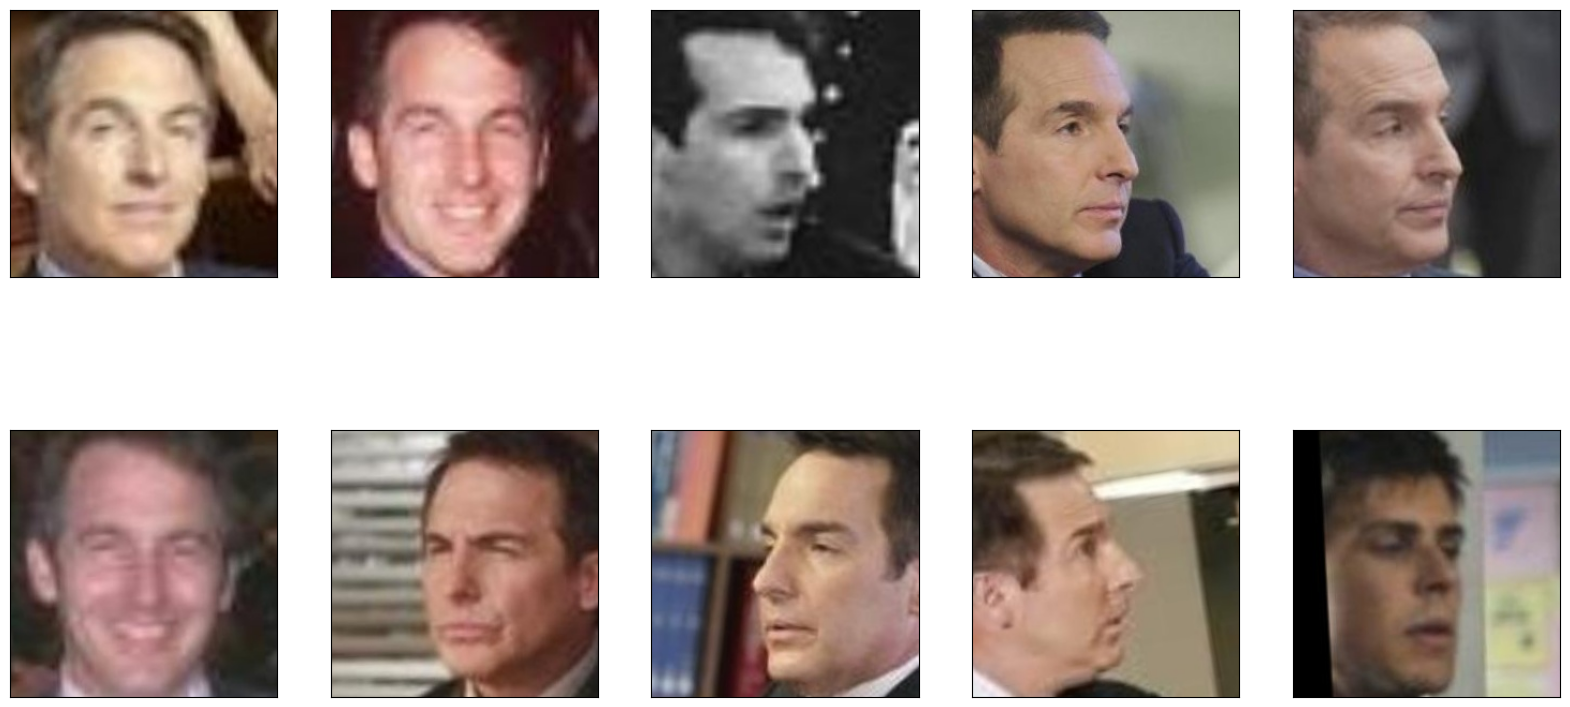

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

PATH_TO_DATASET = "/content/drive/MyDrive/IntelligentSystem/casia-webface-datasets/"

def load_images_from_dataset(folder, limit=10):
    images = []
    count = 0
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            count += 1
        if count >= limit:
            return images
    return images

def visualize_images(images, rows=2, cols=5):
    fig = plt.figure(figsize=(20, 10))
    for i in range(len(images)):
        print(images[i].shape)
        ax = fig.add_subplot(rows, cols, i + 1, xticks=[], yticks=[])
        ax.imshow(images[i])
    plt.show()

# Load and visible 10 images
images = load_images_from_dataset(PATH_TO_DATASET, limit=10)
visualize_images(images)

##Clone repository

In [ ]:
!git clone https://github.com/yule-li/CosFace.git

%cd CosFace

!ls

Cloning into 'CosFace'...
remote: Enumerating objects: 124, done.
remote: Total 124 (delta 0), reused 0 (delta 0), pack-reused 124 (from 1)
Receiving objects: 100% (124/124), 1.02 MiB | 11.46 MiB/s, done.
Resolving deltas: 100% (52/52), done.


Create cleaned list repository

In [ ]:
import os

DATASET_DIR = "/content/drive/MyDrive/IntelligentSystem/casia-webface-datasets/"
OUTPUT_FILE = "/content/CosFace/dataset/cleaned_list.txt"

with open(OUTPUT_FILE, "w") as f:
    for img_name in os.listdir(DATASET_DIR):
        if img_name.lower().endswith((".jpg", ".png", ".jpeg")):
            label, _ = img_name.split("_")
            f.write(f"{img_name} {label}\n")

print("Saved list to", OUTPUT_FILE)

Saved list to /content/CosFace/dataset/cleaned_list.txt


Change config in train.sh

*   You must open train.sh
*   Chang config like this:

IMAGE_HEIGHT=250 \
IMAGE_WIDTH=250

if image size like in section **Display 10 image is dataset**

CosFace  drive	sample_data


##Code to show multiple image